# Project Work
---

## Questions to Answer:

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- could create separate dataframes for each program
- group by `name` and look at most frequent `path` values
- look at this after grouping `path` values into modules.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- look for users with low count of requests between `start_date` and `end_date`
- we have their ip, start/end dates, and program type

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- look for most frequent `path` values accessed after `end_date`
 - too many unique paths to get useful info
- group by module to see which modules are most often referenced by grads

### 7. Which lessons are least accessed?
- look for least common module
- do this after grouping `path` values into modules.

In [1]:
# imports
import wrangle as w
import pandas as pd
import numpy as np

# wrangle data
logs = w.wrangle_logs()
# preview data
logs.head()

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-01-26 09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java


In [2]:
# check for any nulls
logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          847329 non-null  object
 1   ip            847330 non-null  object
 2   user_id       847330 non-null  int64 
 3   name          847330 non-null  object
 4   program_id    847330 non-null  int64 
 5   start_date    847330 non-null  object
 6   end_date      847330 non-null  object
 7   program_name  847330 non-null  object
dtypes: int64(2), object(6)
memory usage: 58.2+ MB


In [3]:
# see how many paths were accessed only once
logs.path.value_counts()[logs.path.value_counts() < 2]

Regression%20_Project.md    1
app                         1
ltc-python                  1
quiz115                     1
joins                       1
                           ..
appendix/cli/2-Overview     1
Clustering_Explore          1
capstone/52                 1
capstone/54                 1
appendix/3d-plotting        1
Name: path, Length: 467, dtype: int64

In [4]:
# view number of unique pages accessed by students after their program has ended
logs[(logs.index > logs.end_date) & (logs.name != 'Staff') & (logs.path != '/')].path.nunique()

1376

Since I'm really only interested in student access logs, I'll create a separate dataframe for just student access logs and use that for my exploration.

In [5]:
# isolate student access logs
student_logs = logs[logs.name != 'Staff']
student_logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763299 entries, 2018-01-26 09:55:03 to 2021-04-21 16:41:51
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          763298 non-null  object
 1   ip            763299 non-null  object
 2   user_id       763299 non-null  int64 
 3   name          763299 non-null  object
 4   program_id    763299 non-null  int64 
 5   start_date    763299 non-null  object
 6   end_date      763299 non-null  object
 7   program_name  763299 non-null  object
dtypes: int64(2), object(6)
memory usage: 52.4+ MB


I'm also not interested in logs where students visited the main page, so I'll get rid of those as well.

In [6]:
student_logs = student_logs[student_logs.path != '/']
student_logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723785 entries, 2018-01-26 09:56:02 to 2021-04-21 16:41:51
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          723784 non-null  object
 1   ip            723785 non-null  object
 2   user_id       723785 non-null  int64 
 3   name          723785 non-null  object
 4   program_id    723785 non-null  int64 
 5   start_date    723785 non-null  object
 6   end_date      723785 non-null  object
 7   program_name  723785 non-null  object
dtypes: int64(2), object(6)
memory usage: 49.7+ MB


In [7]:
# drop that one row which has a null path
student_logs.dropna(inplace=True)

In [8]:
# split paths into lists
student_logs['split_path'] = student_logs.path.str.split('/')
student_logs

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii]
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]"
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]"
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]"
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]"
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[jquery, personal-site]"
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,"[html-css, css-ii, bootstrap-grid-system]"
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,[java-iii]
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[java-iii, servlets]"


In [9]:
# label access logs by module
student_logs['module'] = [listy[0] for listy in student_logs.split_path]
student_logs

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]",slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i
...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[jquery, personal-site]",jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,"[html-css, css-ii, bootstrap-grid-system]",html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,[java-iii],java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[java-iii, servlets]",java-iii


In [10]:
# number of unique paths containing 'java'
student_logs[student_logs.path.str.contains('java')].path.nunique()

191

In [11]:
# number of unique paths containing 'php'
student_logs[student_logs.path.str.contains('php')].path.nunique()

119

In [12]:
# number of unique paths containing 'data-sci'
student_logs[student_logs.path.str.contains('data-sci')].path.nunique()

16

In [13]:
# view number of unique paths
student_logs.path.nunique()

1843

There are 1,843 unique pages that were visited by Codeup students (in this dataset).

I want to create separate dataframes for each program to try and figure out which pages go with each program.

In [14]:
# create php dataframe
php = student_logs[student_logs.program_id == 1]
print(php.user_id.nunique())
php.head(2)

93


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii


In [15]:
# create java dataframe
java = student_logs[student_logs.program_id == 2]
print(java.user_id.nunique())
java.head(2)

676


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i


In [16]:
# create data science dataframe
ds = student_logs[student_logs.program_id == 3]
print(ds.user_id.nunique())
ds.head(2)

111


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2019-08-20 09:40:28,3-sql/1-mysql-overview,97.105.19.58,470,Bayes,3,2019-08-19,2020-01-30,DataSci,"[3-sql, 1-mysql-overview]",3-sql
2019-08-20 09:40:30,2-storytelling/bad-charts,97.105.19.58,467,Bayes,3,2019-08-19,2020-01-30,DataSci,"[2-storytelling, bad-charts]",2-storytelling


In [17]:
# create front end dataframe
frontend = student_logs[student_logs.program_id == 4]
print(frontend.user_id.nunique())
frontend.head(2)

1


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-03-22 19:01:54,content/html-css,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css]",content
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css, gitbook, images, favicon.ico]",content


In [18]:
# view unique paths for php program
php.path.value_counts()

index.html                                                     1011
javascript-i                                                    736
html-css                                                        542
spring                                                          501
java-iii                                                        479
                                                               ... 
content/appendix/javascript/javascript/functions/scope.html       1
content/jquery/events/mouse-events.html                           1
content/javascript/arrays/arrays                                  1
2-storytelling/misleading1_fox.jpg                                1
Pipeline_Demo                                                     1
Name: path, Length: 709, dtype: int64

In [19]:
# view unique paths for java program
java.path.value_counts()

toc                                      16517
javascript-i                             15640
search/search_index.json                 13863
java-iii                                 11290
html-css                                 11285
                                         ...  
capstone/52                                  1
code-standards/java                          1
css                                          1
tools/codeup                                 1
content/laravel/quickstart/views.html        1
Name: path, Length: 1112, dtype: int64

In [20]:
# view unique paths for data science program
ds.path.value_counts()

search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
                                            ... 
bad-charts                                     1
sql/database                                   1
creating-charts                                1
,%20https://github.com/RaulCPena               1
5-detecting-with-clustering                    1
Name: path, Length: 681, dtype: int64

In [21]:
# view unique paths for front end program
frontend.path.value_counts()

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
Name: path, dtype: int64

In [22]:
# see how may cohorts were in front end program
frontend.name.value_counts()

Apollo    4
Name: name, dtype: int64

In [23]:
# view users in front end program
frontend.user_id.value_counts()

152    4
Name: user_id, dtype: int64

Only one user ever accessed the Front End curriculum. I want to see if there is anyone else in the Apollo cohort and if not I won't worry about exploring this program at all since it would practically be nonexistent in comparison to the others. Also, this program does not appear to have continued past Apollo so it's unlikely our stakeholder would be interested in this at all.

In [24]:
# view curriculum access logs for Apollo cohort
student_logs[student_logs.name == 'Apollo']

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-03-22 19:01:54,content/html-css,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css]",content
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css, gitbook, images, favicon.ico]",content
2018-03-22 19:02:47,content/html-css,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css]",content
2018-03-22 19:02:52,content/html-css/introduction.html,207.68.209.17,152,Apollo,4,2015-03-30,2015-07-29,FrontEnd,"[content, html-css, introduction.html]",content


In [25]:
# see if there are other html-css pages in curriculum
student_logs.path.str.contains('html-css').sum()

77810

In [26]:
# see when php program ended
php.end_date.max()

'2017-09-22'

In [27]:
# see when java program started
java.start_date.min()

'2016-09-26'

In [28]:
# see last record of java program
java.end_date.max()

'2021-10-01'

In [29]:
# see first and last records of data science program
ds.start_date.min(), ds.end_date.max()

('2019-08-19', '2021-09-03')

So it looks like the only programs that are still being taught are the WebDev-Java and Data Science programs.

In [30]:
# see top 20 pages accessed by php
php.path.value_counts().head(20)

index.html                                                                   1011
javascript-i                                                                  736
html-css                                                                      542
spring                                                                        501
java-iii                                                                      479
java-ii                                                                       454
java-i                                                                        444
javascript-ii                                                                 429
appendix                                                                      409
jquery                                                                        344
mysql                                                                         284
content/html-css                                                              262
javascript-i/int

In [31]:
# see top 20 pages accessed by java
java.path.value_counts().head(20)

toc                                                                          16517
javascript-i                                                                 15640
search/search_index.json                                                     13863
java-iii                                                                     11290
html-css                                                                     11285
java-ii                                                                      10459
spring                                                                        9973
jquery                                                                        9776
mysql                                                                         9423
java-i                                                                        9161
javascript-ii                                                                 8868
javascript-i/introduction/working-with-data-types-operators-and-variables     6809
java

In [32]:
# see top 20 pages accessed by ds
ds.path.value_counts().head(20)

search/search_index.json                             2203
classification/overview                              1785
1-fundamentals/modern-data-scientist.jpg             1655
1-fundamentals/AI-ML-DL-timeline.jpg                 1651
1-fundamentals/1.1-intro-to-data-science             1633
classification/scale_features_or_not.svg             1590
fundamentals/AI-ML-DL-timeline.jpg                   1443
fundamentals/modern-data-scientist.jpg               1438
sql/mysql-overview                                   1424
fundamentals/intro-to-data-science                   1413
6-regression/1-overview                              1124
anomaly-detection/AnomalyDetectionCartoon.jpeg        829
anomaly-detection/overview                            804
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     754
10-anomaly-detection/1-overview                       751
3-sql/1-mysql-overview                                707
1-fundamentals/DataToAction_v2.jpg                    675
stats/compare-

In [33]:
# view top 10 most accessed modules for data science
ds.module.value_counts().head(10)

fundamentals      8746
classification    8620
1-fundamentals    7945
sql               7505
3-sql             6165
python            5599
4-python          4856
6-regression      4562
appendix          3944
5-stats           3361
Name: module, dtype: int64

I'm curious about what is being looked at in the appendix so I'll investigate that a little more.

In [34]:
# look at appendix pages
ds[ds.module == 'appendix']

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2019-08-20 09:40:50,appendix/cli-git-overview,97.105.19.58,479,Bayes,3,2019-08-19,2020-01-30,DataSci,"[appendix, cli-git-overview]",appendix
2019-08-21 13:55:51,appendix/cli-git-overview,97.105.19.58,467,Bayes,3,2019-08-19,2020-01-30,DataSci,"[appendix, cli-git-overview]",appendix
2019-08-22 09:40:29,appendix/interview_questions_students,97.105.19.58,473,Bayes,3,2019-08-19,2020-01-30,DataSci,"[appendix, interview_questions_students]",appendix
2019-08-23 08:21:37,appendix/cli-git-overview,97.105.19.58,470,Bayes,3,2019-08-19,2020-01-30,DataSci,"[appendix, cli-git-overview]",appendix
2019-08-23 16:39:09,appendix/cli-git-overview,97.105.19.58,470,Bayes,3,2019-08-19,2020-01-30,DataSci,"[appendix, cli-git-overview]",appendix
...,...,...,...,...,...,...,...,...,...,...
2021-04-20 19:06:59,appendix/professional-development/t-block-less...,185.247.70.173,580,Curie,3,2020-02-03,2020-07-07,DataSci,"[appendix, professional-development, t-block-l...",appendix
2021-04-20 21:18:22,appendix/postwork,148.66.39.72,845,Easley,3,2020-12-07,2021-06-08,DataSci,"[appendix, postwork]",appendix
2021-04-20 21:18:26,appendix/ds-environment-setup,148.66.39.72,845,Easley,3,2020-12-07,2021-06-08,DataSci,"[appendix, ds-environment-setup]",appendix
2021-04-21 08:30:37,appendix/professional-development/vertical-resume,172.58.111.66,843,Easley,3,2020-12-07,2021-06-08,DataSci,"[appendix, professional-development, vertical-...",appendix


I'm more interested in what is being looked at within the appendix than just the fact that the appendix was being looked at so I want to re-label these rows.

In [35]:
# look at appendix access logs
student_logs[student_logs.path == 'appendix']

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-01-26 10:35:32,appendix,97.105.19.61,15,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,[appendix],appendix
2018-01-26 11:11:56,appendix,97.105.19.61,22,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,[appendix],appendix
2018-01-26 11:24:17,appendix,97.105.19.61,24,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,[appendix],appendix
2018-01-26 11:36:36,appendix,97.105.19.61,16,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,[appendix],appendix
2018-01-26 11:46:39,appendix,97.105.19.61,11,Arches,1,2014-02-04,2014-04-22,WebDev-PHP,[appendix],appendix
...,...,...,...,...,...,...,...,...,...,...
2021-04-20 16:54:59,appendix,107.77.217.115,979,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,[appendix],appendix
2021-04-20 16:57:00,appendix,107.77.217.115,979,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,[appendix],appendix
2021-04-20 16:57:45,appendix,107.77.217.115,979,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,[appendix],appendix
2021-04-20 23:46:57,appendix,72.191.142.5,919,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,[appendix],appendix


The results above are just looking at the main appendix page but it doesn't tell me anything about what content they're actually viewing so I'll get rid of these too.

In [36]:
# drop main appendix page logs
student_logs = student_logs[student_logs.path != 'appendix']
student_logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717009 entries, 2018-01-26 09:56:02 to 2021-04-21 16:41:51
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          717009 non-null  object
 1   ip            717009 non-null  object
 2   user_id       717009 non-null  int64 
 3   name          717009 non-null  object
 4   program_id    717009 non-null  int64 
 5   start_date    717009 non-null  object
 6   end_date      717009 non-null  object
 7   program_name  717009 non-null  object
 8   split_path    717009 non-null  object
 9   module        717009 non-null  object
dtypes: int64(2), object(8)
memory usage: 60.2+ MB


In [59]:
# get sub-path for each content log
content = student_logs[student_logs.module == 'content']
content['cont_mod'] = [av[1] for av in content.split_path]
content

<ipython-input-59-271aeac33cbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['cont_mod'] = [av[1] for av in content.split_path]


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,cont_mod
2018-01-26 12:38:12,content/javascript/objects/math.html,192.171.117.210,37,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP,"[content, javascript, objects, math.html]",content,javascript
2018-01-26 12:38:19,content/laravel/quickstart/sessions.html,192.171.117.210,37,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP,"[content, laravel, quickstart, sessions.html]",content,laravel
2018-01-27 07:27:52,content/mysql/intro-to-mysql/users.html,72.179.161.39,51,Kings,1,2016-05-23,2016-09-15,WebDev-PHP,"[content, mysql, intro-to-mysql, users.html]",content,mysql
2018-01-27 07:28:04,content/html-css,72.179.161.39,51,Kings,1,2016-05-23,2016-09-15,WebDev-PHP,"[content, html-css]",content,html-css
2018-01-27 07:28:09,content/html-css/elements.html,72.179.161.39,51,Kings,1,2016-05-23,2016-09-15,WebDev-PHP,"[content, html-css, elements.html]",content,html-css
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 00:20:55,content/javascript/conditionals.html,72.179.168.148,51,Kings,1,2016-05-23,2016-09-15,WebDev-PHP,"[content, javascript, conditionals.html]",content,javascript
2021-04-10 00:21:15,content/javascript/loops.html,72.179.168.148,51,Kings,1,2016-05-23,2016-09-15,WebDev-PHP,"[content, javascript, loops.html]",content,javascript
2021-04-10 00:28:10,content/javascript/javascript-with-html.html,136.50.29.193,80,Lassen,1,2016-07-18,2016-11-10,WebDev-PHP,"[content, javascript, javascript-with-html.html]",content,javascript
2021-04-10 00:28:11,content/javascript/conditionals.html,136.50.29.193,80,Lassen,1,2016-07-18,2016-11-10,WebDev-PHP,"[content, javascript, conditionals.html]",content,javascript


In [37]:
# get sub-path for each appendix log
appendix_views = student_logs[student_logs.module == 'appendix']
appendix_views['ap_mod'] = [av[1] for av in appendix_views.split_path]
appendix_views

<ipython-input-37-5369602bcb48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appendix_views['ap_mod'] = [av[1] for av in appendix_views.split_path]


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod
2018-01-26 10:35:36,appendix/capstone-workbook,97.105.19.61,15,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,capstone-workbook
2018-01-26 11:03:54,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:04:03,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:12:04,appendix/capstone-workbook,97.105.19.61,10,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,capstone-workbook
2018-01-26 11:12:07,appendix/capstone-workbook,97.105.19.61,22,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,capstone-workbook
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 10:54:33,appendix/professional-development/t-block-less...,99.158.249.67,838,Easley,3,2020-12-07,2021-06-08,DataSci,"[appendix, professional-development, t-block-l...",appendix,professional-development
2021-04-21 12:03:56,appendix/pair-programming,99.65.201.242,866,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[appendix, pair-programming]",appendix,pair-programming
2021-04-21 12:56:51,appendix/pair-programming,50.213.66.214,226,Wrangell,2,2018-07-23,2018-11-29,WebDev-Java,"[appendix, pair-programming]",appendix,pair-programming
2021-04-21 14:39:44,appendix/further-reading/jquery/effects,173.173.98.137,870,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[appendix, further-reading, jquery, effects]",appendix,further-reading


In [38]:
# drop further-reading main page access logs
ap_further_reading = appendix_views[(appendix_views.ap_mod == 'further-reading') & (appendix_views.path != 'appendix/further-reading')]
ap_further_reading

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod
2018-01-26 11:03:54,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:04:03,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:26:49,appendix/further-reading/javascript/hoisting.html,97.105.19.61,19,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:46:03,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
2018-01-26 11:46:09,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 14:22:30,appendix/further-reading/jquery/effects,72.191.50.129,495,Deimos,2,2019-09-16,2020-02-27,WebDev-Java,"[appendix, further-reading, jquery, effects]",appendix,further-reading
2021-04-20 14:33:56,appendix/further-reading/java/intellij-tomcat-...,72.181.149.13,791,Kalypso,2,2020-11-02,2021-05-04,WebDev-Java,"[appendix, further-reading, java, intellij-tom...",appendix,further-reading
2021-04-20 15:18:55,appendix/further-reading/spring/seeder,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[appendix, further-reading, spring, seeder]",appendix,further-reading
2021-04-21 09:56:41,appendix/further-reading/java/intellij-tomcat-...,85.106.97.135,823,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[appendix, further-reading, java, intellij-tom...",appendix,further-reading


In [39]:
# get sub-paths for each further-reading log within the appendix
ap_further_reading['fr_mod'] = [fr[2] for fr in ap_further_reading.split_path]
ap_further_reading

<ipython-input-39-305109c5bbf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_further_reading['fr_mod'] = [fr[2] for fr in ap_further_reading.split_path]


,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod,fr_mod
2018-01-26 11:03:54,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading,javascript
2018-01-26 11:04:03,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading,javascript
2018-01-26 11:26:49,appendix/further-reading/javascript/hoisting.html,97.105.19.61,19,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading,javascript
2018-01-26 11:46:03,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading,javascript
2018-01-26 11:46:09,appendix/further-reading/javascript/hoisting.html,97.105.19.61,5,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[appendix, further-reading, javascript, hoisti...",appendix,further-reading,javascript
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 14:22:30,appendix/further-reading/jquery/effects,72.191.50.129,495,Deimos,2,2019-09-16,2020-02-27,WebDev-Java,"[appendix, further-reading, jquery, effects]",appendix,further-reading,jquery
2021-04-20 14:33:56,appendix/further-reading/java/intellij-tomcat-...,72.181.149.13,791,Kalypso,2,2020-11-02,2021-05-04,WebDev-Java,"[appendix, further-reading, java, intellij-tom...",appendix,further-reading,java
2021-04-20 15:18:55,appendix/further-reading/spring/seeder,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[appendix, further-reading, spring, seeder]",appendix,further-reading,spring
2021-04-21 09:56:41,appendix/further-reading/java/intellij-tomcat-...,85.106.97.135,823,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[appendix, further-reading, java, intellij-tom...",appendix,further-reading,java


I know I won't be interested in pages that are basically a table of contents. So far these include the following paths:
- `/`
- `appendix`
- `appendix/further-reading`
- `toc`

In [40]:
# drop main pages from dataframe
s_logs = student_logs[~student_logs.path.isin(['/', 'appendix', 'appendix/further-reading', 'toc'])]
s_logs

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]",slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i
...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[jquery, personal-site]",jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,"[html-css, css-ii, bootstrap-grid-system]",html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,[java-iii],java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[java-iii, servlets]",java-iii


In [41]:
# add sub-path columns to curriculum access logs
merged = pd.merge(s_logs, ap_further_reading[['ap_mod', 'fr_mod']], how='left', left_index=True, right_index=True)
merged.head()

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod,fr_mod
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii,NaN,NaN
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii,NaN,NaN
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]",slides,NaN,NaN
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i,NaN,NaN
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i,NaN,NaN


In [42]:
# combine columns
merged['lesson'] = np.where(merged.ap_mod.isnull(), merged.module, merged.ap_mod)
merged

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod,fr_mod,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii,NaN,NaN,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii,NaN,NaN,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]",slides,NaN,NaN,slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i,NaN,NaN,javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i,NaN,NaN,javascript-i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[jquery, personal-site]",jquery,NaN,NaN,jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,"[html-css, css-ii, bootstrap-grid-system]",html-css,NaN,NaN,html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,[java-iii],java-iii,NaN,NaN,java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[java-iii, servlets]",java-iii,NaN,NaN,java-iii


In [43]:
# combine columns
merged['lesson'] = np.where(merged.fr_mod.isnull(), merged.lesson, merged.fr_mod)
merged

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod,fr_mod,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,[java-ii],java-ii,NaN,NaN,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[java-ii, object-oriented-programming]",java-ii,NaN,NaN,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,"[slides, object_oriented_programming]",slides,NaN,NaN,slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, conditionals]",javascript-i,NaN,NaN,javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,"[javascript-i, loops]",javascript-i,NaN,NaN,javascript-i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[jquery, personal-site]",jquery,NaN,NaN,jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,"[html-css, css-ii, bootstrap-grid-system]",html-css,NaN,NaN,html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,[java-iii],java-iii,NaN,NaN,java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,"[java-iii, servlets]",java-iii,NaN,NaN,java-iii


In [44]:
merged[merged.lesson == 'appendix']

,path,ip,user_id,name,program_id,start_date,end_date,program_name,split_path,module,ap_mod,fr_mod,lesson
2018-01-26 10:35:36,appendix/capstone-workbook,97.105.19.61,15,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,NaN,NaN,appendix
2018-01-26 11:12:04,appendix/capstone-workbook,97.105.19.61,10,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,NaN,NaN,appendix
2018-01-26 11:12:07,appendix/capstone-workbook,97.105.19.61,22,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,NaN,NaN,appendix
2018-01-26 11:24:29,appendix/capstone-workbook,97.105.19.61,24,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,NaN,NaN,appendix
2018-01-26 11:36:38,appendix/capstone-workbook,97.105.19.61,16,Sequoia,2,2017-09-27,2018-02-15,WebDev-Java,"[appendix, capstone-workbook]",appendix,NaN,NaN,appendix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 10:21:13,appendix/extra-challenges/basic-challenges,73.85.64.161,978,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,"[appendix, extra-challenges, basic-challenges]",appendix,NaN,NaN,appendix
2021-04-21 10:54:33,appendix/professional-development/t-block-less...,99.158.249.67,838,Easley,3,2020-12-07,2021-06-08,DataSci,"[appendix, professional-development, t-block-l...",appendix,NaN,NaN,appendix
2021-04-21 12:03:56,appendix/pair-programming,99.65.201.242,866,Marco,2,2021-01-25,2021-07-19,WebDev-Java,"[appendix, pair-programming]",appendix,NaN,NaN,appendix
2021-04-21 12:56:51,appendix/pair-programming,50.213.66.214,226,Wrangell,2,2018-07-23,2018-11-29,WebDev-Java,"[appendix, pair-programming]",appendix,NaN,NaN,appendix


In [45]:
# drop unnecessary columns
merged.drop(columns=['module', 'ap_mod', 'fr_mod', 'split_path'], inplace=True)

In [61]:
def s_wrangle():
    '''
    This function takes no arguments and prepares the curriculum log data for exploration
    to answer my half of the questions.
    '''
    student_logs = w.wrangle_logs()
    student_logs = student_logs[(student_logs.name != 'Staff') & (~student_logs.path.isin(['/', 'appendix', 'appendix/further-reading', 'toc']))]
    student_logs.dropna(inplace=True)
    student_logs['split_path'] = student_logs.path.str.split('/')
    student_logs['module'] = [lst[0] for lst in student_logs.split_path]
    # get sub-path for each content log
    content = student_logs[student_logs.module == 'content']
    content['cont_mod'] = [av[1] for av in content.split_path]
    # get sub-path for each appendix log
    appendix_views = content[content.module == 'appendix']
    appendix_views['ap_mod'] = [av[1] for av in appendix_views.split_path]
    # drop further-reading main page access logs
    ap_further_reading = appendix_views[(appendix_views.ap_mod == 'further-reading') & (appendix_views.path != 'appendix/further-reading')]
    # get sub-paths for each further-reading log within the appendix
    ap_further_reading['fr_mod'] = [fr[2] for fr in ap_further_reading.split_path]
    # add sub-path columns to curriculum access logs
    merged = pd.merge(student_logs, ap_further_reading[['cont_mod', 'ap_mod', 'fr_mod']], how='left', left_index=True, right_index=True)
    # combine columns
    merged['lesson'] = np.where(merged.cont_mod.isnull(), merged.module, merged.cont_mod)
    merged['lesson'] = np.where(merged.ap_mod.isnull(), merged.lesson, merged.ap_mod)
    merged['lesson'] = np.where(merged.fr_mod.isnull(), merged.lesson, merged.fr_mod)
    # drop unnecessary columns
    merged.drop(columns=['module', 'cont_mod', 'ap_mod', 'fr_mod', 'split_path'], inplace=True)
    return merged
df = s_wrangle()
df

<ipython-input-61-2b029357f89b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['cont_mod'] = [av[1] for av in content.split_path]


,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii


In [63]:
# view info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700326 entries, 2018-01-26 09:56:02 to 2021-04-21 16:41:51
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          700326 non-null  object
 1   ip            700326 non-null  object
 2   user_id       700326 non-null  int64 
 3   name          700326 non-null  object
 4   program_id    700326 non-null  int64 
 5   start_date    700326 non-null  object
 6   end_date      700326 non-null  object
 7   program_name  700326 non-null  object
 8   lesson        700326 non-null  object
dtypes: int64(2), object(7)
memory usage: 53.4+ MB


## `df` is a dataframe containing a column of the module accessed by the student.

This is the dataframe I'll be using to find information about which modules are most frquently accessed!

Now I'll re-create the program dataframes using `df`.


Note: I noticed that some of the appendix and further-reading rows slipped through. I don't have time to address this at this time so I'll work around it in the interest of answering my questions.

In [64]:
php = df[df.program_id == 1]
java = df[df.program_id == 2]
ds = df[df.program_id == 3]

In [65]:
# view top 10 most accessed modules for php
php.lesson.value_counts().head(10)

content          6397
javascript-i     3708
html-css         2463
spring           2324
mysql            2067
java-iii         1953
java-ii          1572
jquery           1526
java-i           1456
javascript-ii    1405
Name: lesson, dtype: int64

[Text(0.5, 1.0, 'Web Development (PHP) Curriculum Access')]

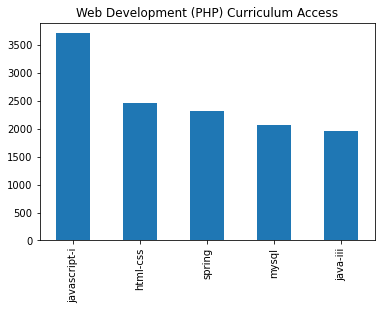

In [75]:
# drop logs for 'content'
php = php[php.lesson != 'content']
php.lesson.value_counts().head(5).plot(kind='bar').set(title='Web Development (PHP) Curriculum Access')

In [71]:
# view top 10 most accessed lessons for java
java = java[java.lesson != 'appendix']
java.lesson.value_counts().head(5)

javascript-i    103817
html-css         73679
mysql            71665
jquery           52554
java-iii         47857
Name: lesson, dtype: int64

In [72]:
ds.lesson.value_counts().head(5)

fundamentals      8746
classification    8620
1-fundamentals    7945
sql               7505
3-sql             6165
Name: lesson, dtype: int64

In [58]:
# isolate student access logs after program end
after_grad = merged[merged.end_date < merged.index]
after_grad

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,slides
2018-01-26 10:14:51,javascript-i,97.105.19.61,11,Arches,1,2014-02-04,2014-04-22,WebDev-PHP,javascript-i
2018-01-26 10:15:02,javascript-i/functions,97.105.19.61,11,Arches,1,2014-02-04,2014-04-22,WebDev-PHP,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 15:20:12,classification/overview,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12,DataSci,classification
2021-04-21 15:20:12,classification/classical_programming_vs_machin...,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12,DataSci,classification
2021-04-21 15:20:12,classification/scale_features_or_not.svg,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12,DataSci,classification
2021-04-21 15:20:14,classification/project,96.8.130.134,692,Darden,3,2020-07-13,2021-01-12,DataSci,classification
